In [1]:
import torch
from doctr.models import crnn_mobilenet_v3_large
from doctr.models import recognition_predictor, ocr_predictor
from doctr.io import DocumentFile
import matplotlib.pyplot as plt
from doctr.datasets import VOCABS


# Add Tifinagh characters to VOCAB
tifinagh = ""
for i in range(0x2D30, 0x2D67 + 1):
    tifinagh += chr(i)
tifinagh += chr(0x2D6F)
tifinagh += chr(0x2D70)
tifinagh += chr(0x2D7F)
VOCABS['tifinagh'] = tifinagh
VOCABS['tamazight'] = VOCABS["french"] + VOCABS['tifinagh']

# Load custom recognition model
reco_model = crnn_mobilenet_v3_large(pretrained=False, pretrained_backbone=False, vocab=VOCABS['tamazight'])
reco_params = torch.load('crnn_mobilenet_v3_large_tifinagh.pt', map_location="cpu")
reco_model.load_state_dict(reco_params)
reco_predictor = recognition_predictor(reco_model, pretrained=True)

(-0.5, 239.5, 49.5, -0.5)

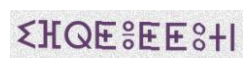

In [2]:
image_path = "val/images/0.jpg"
input_page = DocumentFile.from_images(image_path)[0]

# Display the input image
plt.figure(figsize=(3, 3))
plt.imshow(input_page)
plt.axis('off')

In [3]:
out = reco_predictor([input_page])
print(f"Prediction: {out[0][0]}\nConfidence: {out[0][1]:.2f}")

Prediction: ⵉⴼⵕⵟⴻⵟⵟⵓⵜⵏ
Confidence: 0.71


(-0.5, 749.5, 549.5, -0.5)

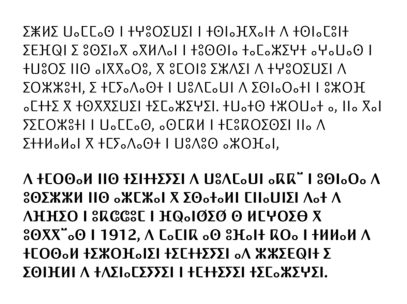

In [4]:
predictor = ocr_predictor(reco_arch=reco_model, pretrained=True)

image_path = "Tifinagh-JP1.png"
input_page = DocumentFile.from_images(image_path)[0]

# Display the input image
plt.figure(figsize=(5, 5))
plt.imshow(input_page)
plt.axis('off')

In [5]:
output = predictor([input_page])

In [6]:
res = ""
for obj in output.pages:
    for obj1 in obj.blocks:
        for obj2 in obj1.lines:
            for obj3 in obj2.words:
                res = res + " " + obj3.value
        res = res + "\n"
    res = res + "\n\n"
print(res)

 ⵉⵥⵍⵉ ⵡⴰⵎⵎⴰⵙ ⴶ ⵜⴶ8ⵔ2ⵡ2ⵏ ⵏ ⵜⵔⵏⴰⴼⵊⵃⴰⵏⵜ ⴷ ⵜⵙⵏⴰⵎⵓⵏⵜ
 2ⴹⵋⵕⵏ ⵉ.ⵙⵉⵏⴰⵅ ⴰⵅⵍⴷⴰ ⵏ ⴶⵜⵓⵙⵙⵏⴰ ⵜⴰⵎⴰⵣ2ⴶⵜ ⴰⴶⴰⵡⴰ0
 ⵜⵡ3ⵓⵔ2 ⵏ1ⵙ ⴰⵅⵅⴰⵔⵓ, ⴳⵓⵎⵔⵏⵓ 2ⵣⴷ2. ⴷ ⵜⴶ6ⵔ2ⵡ2.! ⵃ ⴷ
 2ⵔⵣⵣⵓⵜⵏ, 2 ⵜⵎⵢⴰⴷⴰⵚⵜ ⵏ ⵡ8ⴷⵎⴰⵡ ⵏ ⴷ 2ⵙⵏⴰⵔⴰⵜⵏ ⵏ ⵓⵣⵔⴼ
 ⴰⵎⵜⵜ2 ⵅ ⵜⵙⵃⵅ2.ⵡ2! ⵜ2ⵎoⵄ2ⴶ2ⵏ, ⵜⵡⴰⵜⵙ ⵜⵣⵔⵡⴰⵜ ⵔⴰ  ⵏⵏⴰ ⵅⴰⵏ
 ⵢ2ⵎⵔⵣ<ⵜⵏ ⵏ ⵡⴰ-ⵎⴰⵔ,ⴰⵙⵎⵍⵍ ⵏ ⵜⵎ6ⵍⵔ2ⵙⵡⵏ ⵏⵏⴰⴷ
 2ⵜⵜⵍⴰⵍⴰ ⴳ ⵜⵎ)ⴰⴷⴰⵔⵜ ⵏ ⵡⵓⴷⵓⵙ ⴰⵣⵔⴼⵎⴰⵏ,
 ⴷ ⵜⵎⵔⵙⴰⵍ ⵏ1ⵙ ⵜ2ⵏⵜⵜ2)2. ⴷ ⵡⵓⴷⵎⴰⵡⵏ ⴰⴽ- ⵓⵙⵏⴰⵔⴰⴷ
 ⵓⵙ2ⵣⵣⵍ ⵏ1ⵙ ⴰⵣⵎⵣⴰⵏ ⵅ 2ⵙⴰⵜⴰⵍ ⵎ.ⵏⴰⵡ1 ⴷⴰⵜ ⴷ
 ⴷⴼⵎⴼ2ⵔ ⵏⵓⴽ<ⵛⵛⵓⵎ.1. ⵡⵕⴰⵏ0ⵔ20 ⵙ ⵍⵎⵖⵔ2ⵙ ⵅ
 ⵙⵔⵅⵋ<ⵙ1191<ⴷ ⵎⴰⵎⵏ ⴰⵙ ⵓⴼⴰⵜ ⵃⵔⴰ ⵏ ⵜⵍⵍⴰⵍ ⵏ
 ⵜⵎ0ⵙⴰⵍ ⵜ2ⵄⵔ.ⵙⵏ2ⵏ ⵜ2ⵎⵜⵜ2)2! ⴰⴷ ⵣⵣⵉⴹⵕⵏⵜⵉ
 2ⵙⵏⵊⵍⵏ! ⴷ ⵜⴷⴴ.ⵎⴰⵡ2))ⴴ! ⵏ "ⵜⵎⵜⵜ2)2! ⵜⵢⵎoⵄⵋⴶⵋⵏ,



